**Atualizando a biblioteca para plotagem de gráficos**


In [1]:
!pip -q install plotly --upgrade
!pip -q install yellowbrick

**Importando bibliotecas**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier

**Abrindo um arquivo CSV do drive**

In [3]:
base = pd.read_csv('restaurantev3.csv', sep=';')

**Você também pode carregar seu arquivo e já selecionar as colunas que desejar... investigue esta função**

In [4]:
#base2 = pd.read_csv('restaurante.csv', ';', usecols=['Alternativo', 'Bar'])
#base2

In [5]:
base

,Alternativo,Bar,Sex/Sab,fome,Cliente,Preco,Chuva,Res,Tipo,Tempo,Conclusao
0,Sim,Nao,Nao,Sim,10,100,Nao,Sim,Frances,1,Sim
1,Sim,Nao,Nao,Sim,100,1,Nao,Nao,Tailandes,100,Nao
2,Nao,Sim,Nao,Nao,10,1,Nao,Nao,Hamburger,1,Sim
3,Sim,Nao,Sim,Sim,100,1,Sim,Nao,Tailandes,10,Sim
4,Sim,Nao,Sim,Nao,100,100,Nao,Sim,Frances,1000,Nao
5,Nao,Sim,Nao,Sim,10,10,Sim,Sim,Italiano,1,Sim
6,Nao,Sim,Nao,Nao,1,1,Sim,Nao,Hamburger,1,Nao
7,Nao,Nao,Nao,Sim,10,10,Sim,Sim,Tailandes,1,Sim
8,Nao,Sim,Sim,Nao,100,1,Sim,Nao,Hamburger,1000,Nao
9,Sim,Sim,Sim,Sim,100,100,Nao,Sim,Italiano,10,Nao


In [6]:
base.head(3)

,Alternativo,Bar,Sex/Sab,fome,Cliente,Preco,Chuva,Res,Tipo,Tempo,Conclusao
0,Sim,Nao,Nao,Sim,10,100,Nao,Sim,Frances,1,Sim
1,Sim,Nao,Nao,Sim,100,1,Nao,Nao,Tailandes,100,Nao
2,Nao,Sim,Nao,Nao,10,1,Nao,Nao,Hamburger,1,Sim


In [7]:
base.tail(2)

,Alternativo,Bar,Sex/Sab,fome,Cliente,Preco,Chuva,Res,Tipo,Tempo,Conclusao
10,Nao,Nao,Nao,Nao,1,1,Nao,Nao,Tailandes,1,Nao
11,Sim,Sim,Sim,Sim,100,1,Nao,Nao,Hamburger,100,Sim


**Contando quantidade de instâncias**


In [8]:
np.unique(base['Conclusao'], return_counts=True)

(array(['Nao', 'Sim'], dtype=object), array([6, 6], dtype=int64))

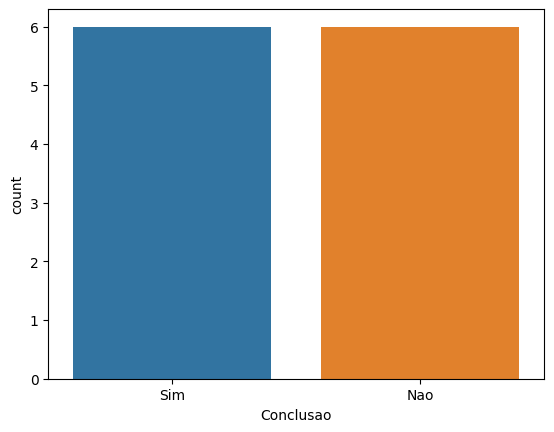

In [9]:
sns.countplot(x = base['Conclusao']);

**Separando os atributos de entrada e de classe**

In [10]:
X_prev = base.iloc[:, 0:10].values

In [11]:
X_prev

array([['Sim', 'Nao', 'Nao', 'Sim', 10, 100, 'Nao', 'Sim', 'Frances', 1],
       ['Sim', 'Nao', 'Nao', 'Sim', 100, 1, 'Nao', 'Nao', 'Tailandes',
        100],
       ['Nao', 'Sim', 'Nao', 'Nao', 10, 1, 'Nao', 'Nao', 'Hamburger', 1],
       ['Sim', 'Nao', 'Sim', 'Sim', 100, 1, 'Sim', 'Nao', 'Tailandes',
        10],
       ['Sim', 'Nao', 'Sim', 'Nao', 100, 100, 'Nao', 'Sim', 'Frances',
        1000],
       ['Nao', 'Sim', 'Nao', 'Sim', 10, 10, 'Sim', 'Sim', 'Italiano', 1],
       ['Nao', 'Sim', 'Nao', 'Nao', 1, 1, 'Sim', 'Nao', 'Hamburger', 1],
       ['Nao', 'Nao', 'Nao', 'Sim', 10, 10, 'Sim', 'Sim', 'Tailandes', 1],
       ['Nao', 'Sim', 'Sim', 'Nao', 100, 1, 'Sim', 'Nao', 'Hamburger',
        1000],
       ['Sim', 'Sim', 'Sim', 'Sim', 100, 100, 'Nao', 'Sim', 'Italiano',
        10],
       ['Nao', 'Nao', 'Nao', 'Nao', 1, 1, 'Nao', 'Nao', 'Tailandes', 1],
       ['Sim', 'Sim', 'Sim', 'Sim', 100, 1, 'Nao', 'Nao', 'Hamburger',
        100]], dtype=object)

In [12]:
X_prev_label = base.iloc[:, 0:10]

In [13]:
X_prev_label

,Alternativo,Bar,Sex/Sab,fome,Cliente,Preco,Chuva,Res,Tipo,Tempo
0,Sim,Nao,Nao,Sim,10,100,Nao,Sim,Frances,1
1,Sim,Nao,Nao,Sim,100,1,Nao,Nao,Tailandes,100
2,Nao,Sim,Nao,Nao,10,1,Nao,Nao,Hamburger,1
3,Sim,Nao,Sim,Sim,100,1,Sim,Nao,Tailandes,10
4,Sim,Nao,Sim,Nao,100,100,Nao,Sim,Frances,1000
5,Nao,Sim,Nao,Sim,10,10,Sim,Sim,Italiano,1
6,Nao,Sim,Nao,Nao,1,1,Sim,Nao,Hamburger,1
7,Nao,Nao,Nao,Sim,10,10,Sim,Sim,Tailandes,1
8,Nao,Sim,Sim,Nao,100,1,Sim,Nao,Hamburger,1000
9,Sim,Sim,Sim,Sim,100,100,Nao,Sim,Italiano,10


In [14]:
X_prev[:,5]

array([100, 1, 1, 1, 100, 10, 1, 10, 1, 100, 1, 1], dtype=object)

In [15]:
y_classe = base.iloc[:, 10].values

In [16]:
y_classe

array(['Sim', 'Nao', 'Sim', 'Sim', 'Nao', 'Sim', 'Nao', 'Sim', 'Nao',
       'Nao', 'Nao', 'Sim'], dtype=object)

**Podemos fazer esta mesma divisão (separar as variáveis de entrada e saída) usando os comandos abaixo**

In [17]:
#X = base.copy()
#y = X.pop('Conclusao')

**Tratamento de dados categóricos**

> *LabelEncoder - Vamos tratar os dados categóricos colocando 1, 2, 3 e etc**



In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
label_encoder = LabelEncoder()

In [20]:
X_prev[:,0]

array(['Sim', 'Sim', 'Nao', 'Sim', 'Sim', 'Nao', 'Nao', 'Nao', 'Nao',
       'Sim', 'Nao', 'Sim'], dtype=object)

In [21]:
X_prev

array([['Sim', 'Nao', 'Nao', 'Sim', 10, 100, 'Nao', 'Sim', 'Frances', 1],
       ['Sim', 'Nao', 'Nao', 'Sim', 100, 1, 'Nao', 'Nao', 'Tailandes',
        100],
       ['Nao', 'Sim', 'Nao', 'Nao', 10, 1, 'Nao', 'Nao', 'Hamburger', 1],
       ['Sim', 'Nao', 'Sim', 'Sim', 100, 1, 'Sim', 'Nao', 'Tailandes',
        10],
       ['Sim', 'Nao', 'Sim', 'Nao', 100, 100, 'Nao', 'Sim', 'Frances',
        1000],
       ['Nao', 'Sim', 'Nao', 'Sim', 10, 10, 'Sim', 'Sim', 'Italiano', 1],
       ['Nao', 'Sim', 'Nao', 'Nao', 1, 1, 'Sim', 'Nao', 'Hamburger', 1],
       ['Nao', 'Nao', 'Nao', 'Sim', 10, 10, 'Sim', 'Sim', 'Tailandes', 1],
       ['Nao', 'Sim', 'Sim', 'Nao', 100, 1, 'Sim', 'Nao', 'Hamburger',
        1000],
       ['Sim', 'Sim', 'Sim', 'Sim', 100, 100, 'Nao', 'Sim', 'Italiano',
        10],
       ['Nao', 'Nao', 'Nao', 'Nao', 1, 1, 'Nao', 'Nao', 'Tailandes', 1],
       ['Sim', 'Sim', 'Sim', 'Sim', 100, 1, 'Nao', 'Nao', 'Hamburger',
        100]], dtype=object)

In [22]:
label_encoder_Alternativo = LabelEncoder()
label_encoder_Bar = LabelEncoder()
label_encoder_SexSab = LabelEncoder()
label_encoder_fome = LabelEncoder()
label_encoder_chuva = LabelEncoder()
label_encoder_Res = LabelEncoder()

In [23]:
X_prev[:,0] = label_encoder_Alternativo.fit_transform(X_prev[:,0])
X_prev[:,1] = label_encoder_Bar.fit_transform(X_prev[:,1])
X_prev[:,2] = label_encoder_SexSab.fit_transform(X_prev[:,2])
X_prev[:,3] = label_encoder_fome.fit_transform(X_prev[:,3])
X_prev[:,4] = label_encoder_chuva.fit_transform(X_prev[:,4])
X_prev[:,5] = label_encoder_Res.fit_transform(X_prev[:,5])
X_prev[:,6] = label_encoder_Alternativo.fit_transform(X_prev[:,6])
X_prev[:,7] = label_encoder_Bar.fit_transform(X_prev[:,7])
X_prev[:,9] = label_encoder_SexSab.fit_transform(X_prev[:,9])

In [24]:
X_prev

array([[1, 0, 0, 1, 1, 2, 0, 1, 'Frances', 0],
       [1, 0, 0, 1, 2, 0, 0, 0, 'Tailandes', 2],
       [0, 1, 0, 0, 1, 0, 0, 0, 'Hamburger', 0],
       [1, 0, 1, 1, 2, 0, 1, 0, 'Tailandes', 1],
       [1, 0, 1, 0, 2, 2, 0, 1, 'Frances', 3],
       [0, 1, 0, 1, 1, 1, 1, 1, 'Italiano', 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 'Hamburger', 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 'Tailandes', 0],
       [0, 1, 1, 0, 2, 0, 1, 0, 'Hamburger', 3],
       [1, 1, 1, 1, 2, 2, 0, 1, 'Italiano', 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 'Tailandes', 0],
       [1, 1, 1, 1, 2, 0, 0, 0, 'Hamburger', 2]], dtype=object)



> OneHotEncoder - Agora vamos binarizar atributos não ordinais

**Contando quantas opções de resposta tem cada atributo**

In [25]:
len(np.unique(base['Cliente']))

3

In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [27]:
X_prev

array([[1, 0, 0, 1, 1, 2, 0, 1, 'Frances', 0],
       [1, 0, 0, 1, 2, 0, 0, 0, 'Tailandes', 2],
       [0, 1, 0, 0, 1, 0, 0, 0, 'Hamburger', 0],
       [1, 0, 1, 1, 2, 0, 1, 0, 'Tailandes', 1],
       [1, 0, 1, 0, 2, 2, 0, 1, 'Frances', 3],
       [0, 1, 0, 1, 1, 1, 1, 1, 'Italiano', 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 'Hamburger', 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 'Tailandes', 0],
       [0, 1, 1, 0, 2, 0, 1, 0, 'Hamburger', 3],
       [1, 1, 1, 1, 2, 2, 0, 1, 'Italiano', 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 'Tailandes', 0],
       [1, 1, 1, 1, 2, 0, 0, 0, 'Hamburger', 2]], dtype=object)

In [28]:
X_prev[:,0:9]

array([[1, 0, 0, 1, 1, 2, 0, 1, 'Frances'],
       [1, 0, 0, 1, 2, 0, 0, 0, 'Tailandes'],
       [0, 1, 0, 0, 1, 0, 0, 0, 'Hamburger'],
       [1, 0, 1, 1, 2, 0, 1, 0, 'Tailandes'],
       [1, 0, 1, 0, 2, 2, 0, 1, 'Frances'],
       [0, 1, 0, 1, 1, 1, 1, 1, 'Italiano'],
       [0, 1, 0, 0, 0, 0, 1, 0, 'Hamburger'],
       [0, 0, 0, 1, 1, 1, 1, 1, 'Tailandes'],
       [0, 1, 1, 0, 2, 0, 1, 0, 'Hamburger'],
       [1, 1, 1, 1, 2, 2, 0, 1, 'Italiano'],
       [0, 0, 0, 0, 0, 0, 0, 0, 'Tailandes'],
       [1, 1, 1, 1, 2, 0, 0, 0, 'Hamburger']], dtype=object)

In [29]:
onehotencoder_restaurante = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [8])], remainder='passthrough')


In [30]:
X_prev= onehotencoder_restaurante.fit_transform(X_prev)

In [31]:
X_prev

array([[1.0, 0.0, 0.0, 0.0, 1, 0, 0, 1, 1, 2, 0, 1, 0],
       [0.0, 0.0, 0.0, 1.0, 1, 0, 0, 1, 2, 0, 0, 0, 2],
       [0.0, 1.0, 0.0, 0.0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0.0, 0.0, 0.0, 1.0, 1, 0, 1, 1, 2, 0, 1, 0, 1],
       [1.0, 0.0, 0.0, 0.0, 1, 0, 1, 0, 2, 2, 0, 1, 3],
       [0.0, 0.0, 1.0, 0.0, 0, 1, 0, 1, 1, 1, 1, 1, 0],
       [0.0, 1.0, 0.0, 0.0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [0.0, 0.0, 0.0, 1.0, 0, 0, 0, 1, 1, 1, 1, 1, 0],
       [0.0, 1.0, 0.0, 0.0, 0, 1, 1, 0, 2, 0, 1, 0, 3],
       [0.0, 0.0, 1.0, 0.0, 1, 1, 1, 1, 2, 2, 0, 1, 1],
       [0.0, 0.0, 0.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0.0, 1.0, 0.0, 0.0, 1, 1, 1, 1, 2, 0, 0, 0, 2]], dtype=object)

In [32]:
X_prev.shape

(12, 13)

**Esta mesma transformação OneHotEncoder pode ser feita com o comando abaixo**

In [33]:
#base = pd.get_dummies(X_prev_label)
#base.head()

**Método de amostragem Holdout**

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_prev

array([[1.0, 0.0, 0.0, 0.0, 1, 0, 0, 1, 1, 2, 0, 1, 0],
       [0.0, 0.0, 0.0, 1.0, 1, 0, 0, 1, 2, 0, 0, 0, 2],
       [0.0, 1.0, 0.0, 0.0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0.0, 0.0, 0.0, 1.0, 1, 0, 1, 1, 2, 0, 1, 0, 1],
       [1.0, 0.0, 0.0, 0.0, 1, 0, 1, 0, 2, 2, 0, 1, 3],
       [0.0, 0.0, 1.0, 0.0, 0, 1, 0, 1, 1, 1, 1, 1, 0],
       [0.0, 1.0, 0.0, 0.0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [0.0, 0.0, 0.0, 1.0, 0, 0, 0, 1, 1, 1, 1, 1, 0],
       [0.0, 1.0, 0.0, 0.0, 0, 1, 1, 0, 2, 0, 1, 0, 3],
       [0.0, 0.0, 1.0, 0.0, 1, 1, 1, 1, 2, 2, 0, 1, 1],
       [0.0, 0.0, 0.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0.0, 1.0, 0.0, 0.0, 1, 1, 1, 1, 2, 0, 0, 0, 2]], dtype=object)

In [36]:
y_classe

array(['Sim', 'Nao', 'Sim', 'Sim', 'Nao', 'Sim', 'Nao', 'Sim', 'Nao',
       'Nao', 'Nao', 'Sim'], dtype=object)

In [37]:
y_classe.shape

(12,)

In [38]:
#X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(X, y, test_size=0.3, random_state=123, shuffle=True, stratify=y)
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size = 0.20, random_state = 23)

In [39]:
X_treino.shape

(9, 13)

In [40]:
X_teste.shape

(3, 13)

**Vamos experimentar agora o algoritmo Decision Tree?**

In [41]:
modelo = DecisionTreeClassifier(criterion='entropy')
Y = modelo.fit(X_treino, y_treino)

**Vamos testar o modelo?**

In [42]:
previsoes = modelo.predict(X_teste)

**Será se o modelo acertou?**

In [43]:
y_teste

array(['Sim', 'Nao', 'Sim'], dtype=object)

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.3333333333333333

In [45]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[0, 1],
       [1, 1]], dtype=int64)

0.3333333333333333

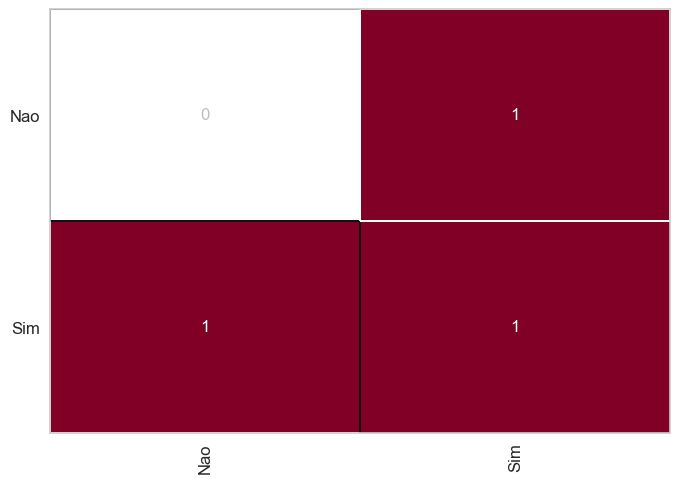

In [46]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [47]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

         Nao       0.00      0.00      0.00         1
         Sim       0.50      0.50      0.50         2

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3



**Vamos ver a árvore?**

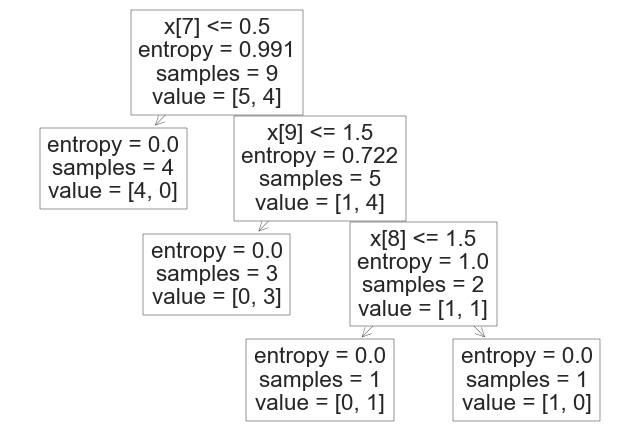

In [48]:
from sklearn import tree
plt.show(tree.plot_tree(Y))

**O que você achou? podemos fazê-la melhor! :-)**

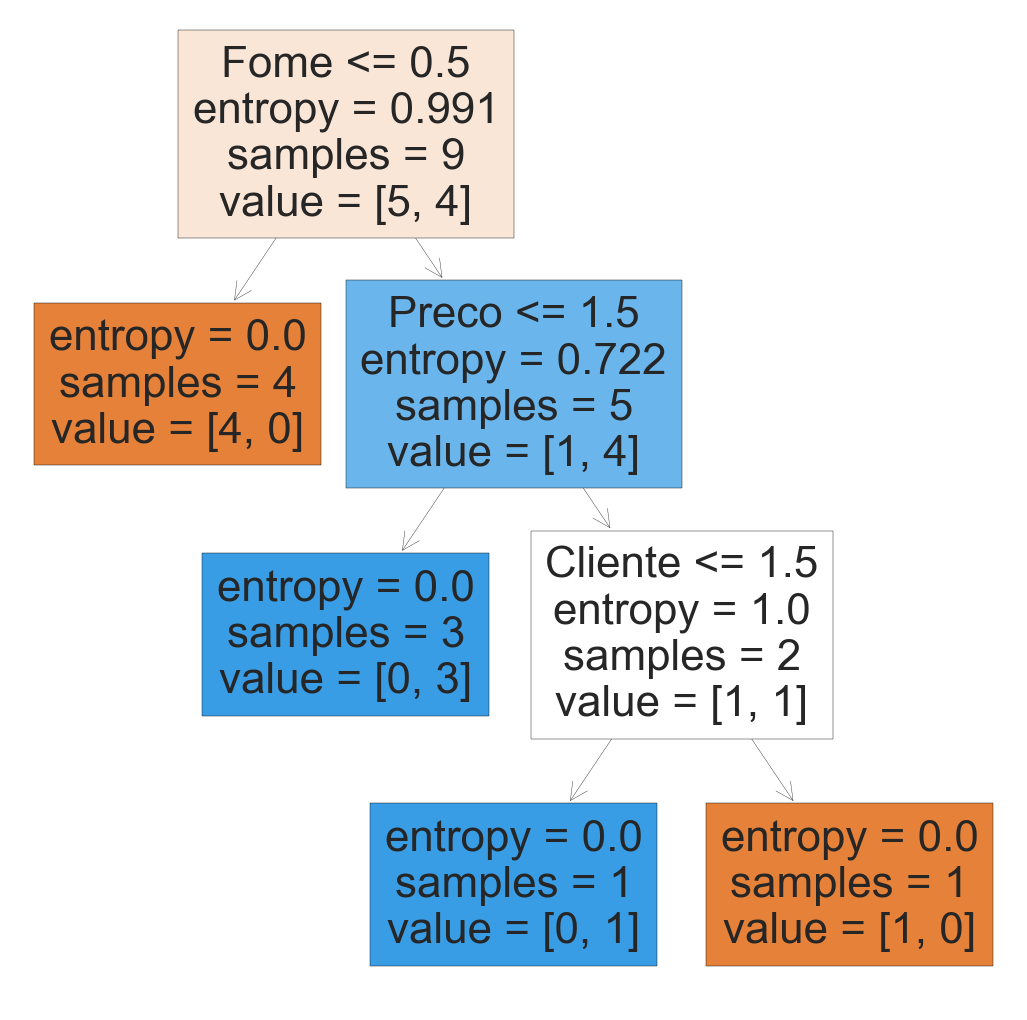

In [49]:
from sklearn import tree
previsores = ['Frances', 'Hamburguer', 'Italiano', 'Tailandes', 'Alternativo', 'Bar', 'SextaSabado', 'Fome', 'Cliente', 'Preco','Chuva','Res', 'Tempo']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(13,13))
tree.plot_tree(modelo, feature_names=previsores, filled=True);